In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

plt.style.use('ggplot')

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.dtypes

Loan_ID               object
Gender               float64
Married               object
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df.describe()

,Gender,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,564.000000
mean,0.817590,0.744300,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.842199
std,0.386497,1.009623,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.364878
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

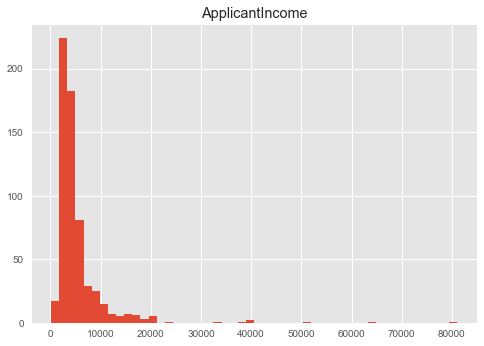

In [6]:
df[['Loan_Status', 'ApplicantIncome']].hist(bins=50)
plt.show()

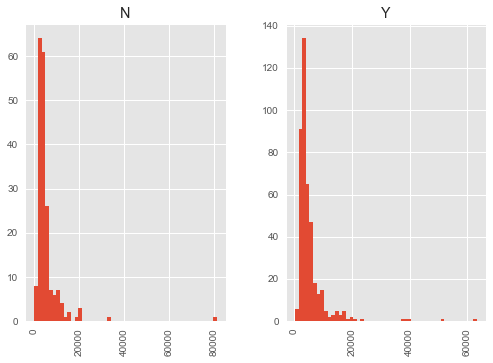

<Figure size 1224x720 with 0 Axes>

In [7]:
df[['Loan_Status', 'ApplicantIncome']].hist(bins=50, by='Loan_Status')
plt.figure(figsize=[17,10])
plt.show()

In [8]:
coapplicants = df['CoapplicantIncome']
coapplicants = coapplicants.apply(lambda x: 'N' if x == 0 else 'Y')

In [9]:
coapplicants.value_counts()

Y    341
N    273
Name: CoapplicantIncome, dtype: int64

In [10]:
df.drop("Loan_ID", axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,No,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1.0,Yes,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,Yes,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,Yes,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,No,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.columns = ['is_Male', 'is_Married', 'Dependents', 'Education', 'is_Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'has_Credit_History', 'Property_Area', 'Loan_Status']

In [12]:
mapper = {'Yes': 1, 'No': 0}
df['is_Married'] = df['is_Married'].map(mapper)



In [13]:
mapper = {'Y': 1, 'N': 0}
df['Loan_Status'] = df["Loan_Status"].map(mapper)

In [14]:
df.isnull().sum().sort_values(ascending=False)

has_Credit_History    50
LoanAmount            22
is_Married             3
Loan_Status            0
Property_Area          0
Loan_Amount_Term       0
CoapplicantIncome      0
ApplicantIncome        0
is_Self_Employed       0
Education              0
Dependents             0
is_Male                0
dtype: int64

In [15]:
df.dropna(subset=['is_Married'], inplace=True)

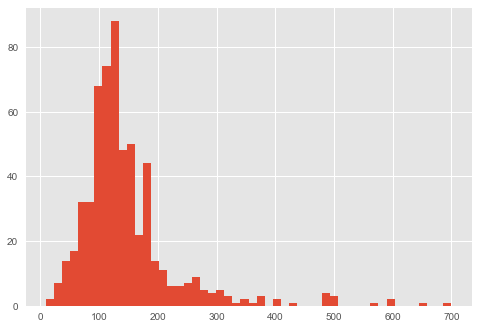

In [16]:
df['LoanAmount'].hist(bins=50)
plt.show()

I'd like to remove the null values for LoanAmount. As the plot shows, the distribution has a long tail. I think that the mean might be biases because of that.
In that sense, I think that the median would be a better guess

In [17]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

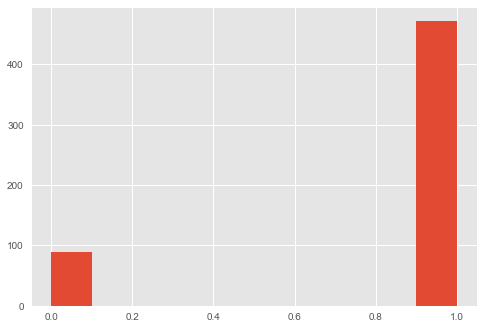

In [18]:
df['has_Credit_History'].hist()
plt.show()
df['has_Credit_History'].fillna(1, inplace=True)

In [19]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [20]:
df = pd.get_dummies(df, columns=['Property_Area'])

In [21]:
# from matplotlib.colors import 
# my_cmap = [cores]
# my_cmap = ListedColormap(sns.color_palette(my_cmap).as_hex())
# sns.heatmap(df.corr(), cmap=my_cmap)

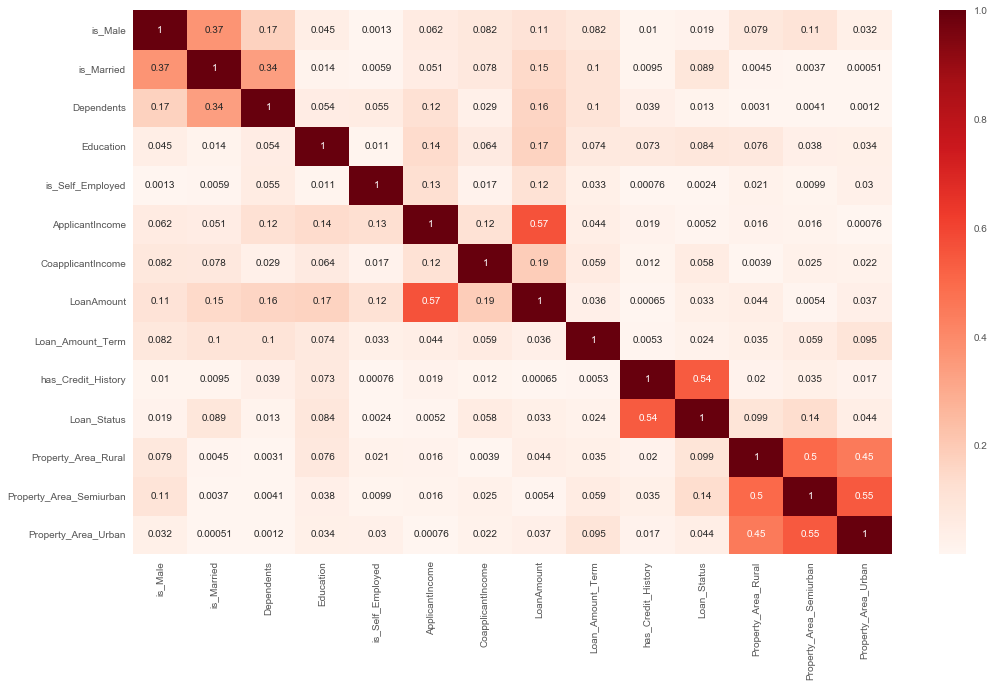

In [22]:
plt.figure(figsize=[17, 10])
sns.heatmap(df.corr().abs(), annot=True, cmap="Reds")
plt.show()

In [23]:
df["TotalIncome"] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [25]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df.loc[df['CoapplicantIncome'] == 0, 'CoapplicantIncome'] = 1
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])
df['TotalIncome'] = np.log(df['TotalIncome'])

# Begining training

In [131]:
X = df.drop("Loan_Status", axis=1)
y = df['Loan_Status']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Logistic Regression

In [133]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
print("Score in train set: {0:.2%}".format(lr.score(X_train, y_train)))
print("Score in test set: {0:.2%}".format(lr.score(X_test, y_test)))

Score in train set: 80.20%
Score in test set: 82.18%


# Decision Tree

In [135]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train, )

print("Score in train set: {0:.2%}".format(dt.score(X_train, y_train)))
print("Score in test set: {0:.2%}".format(dt.score(X_test, y_test)))



Score in train set: 100.00%
Score in test set: 71.78%


Clearly overfitted. Lets limit depth to avoid this problem

In [143]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

print("Score in train set: {0:.2%}".format(dt.score(X_train, y_train)))
print("Score in test set: {0:.2%}".format(dt.score(X_test, y_test)))

Score in train set: 82.64%
Score in test set: 83.17%


# Random Forest

In [151]:
rf = RandomForestClassifier(n_estimators = 100, random_state=42)
rf.fit(X_train, y_train)

print("Score in train set: {0:.2%}".format(dt.score(X_train, y_train)))
print("Score in test set: {0:.2%}".format(dt.score(X_test, y_test)))

Score in train set: 82.64%
Score in test set: 83.17%


Best one was decision tree.

In [152]:
X_test['Loan_Status'] = dt.predict(X_test)

/Users/semaraugusto/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [153]:
X_test.head()

,is_Male,is_Married,Dependents,Education,is_Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,has_Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,Loan_Status
81,1.0,1.0,1.0,1,1.0,7.781139,0.000000,127.5,360.0,1.0,0,1,0,7.781139,1
219,0.0,1.0,2.0,1,0.0,8.362409,7.776115,127.0,360.0,1.0,0,1,0,8.804775,1
55,1.0,1.0,2.0,1,0.0,7.903966,7.062192,97.0,360.0,1.0,0,1,0,8.262301,1
602,1.0,1.0,3.0,1,0.0,8.648748,0.000000,128.0,360.0,1.0,0,0,1,8.648748,1
266,1.0,1.0,2.0,1,0.0,8.457018,7.234898,150.0,360.0,1.0,0,1,0,8.715224,1


In [123]:
X_test.to_csv("clientes_previstos.csv", index=False)

Exporting model to file

In [156]:
import pickle
pickle.dump(dt, open('modelo.sav', 'wb'))